# Метод главных компонент

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA # Метод главных компонент
from sklearn import preprocessing  # функция для предварительной обработки данных
import matplotlib.pyplot as plt  #импотируем подбиблиотеку и даем ей имя
import matplotlib    # для рисования
df = pd.read_csv('Labour.csv')

Основные переменные в датафрейме `df` (данные по бельгийским фирмам за 1996 г.)
- `capital`:капитал (в млн евро)
- `labour`: число сотрудников
- `output`: выпуск (в млн евро)
- `wage`: зарплата на одного сотрудника (в тыс евро)

In [2]:
df.head()

,capital,labour,output,wage
0,2.606563,184,9.250759,43.080307
1,1.323237,91,3.664310,27.780016
2,22.093692,426,28.781516,44.467748
3,10.737851,72,4.124642,39.734710
4,1.161365,46,2.890150,34.650709


Нормализация данных

In [3]:
scaler=preprocessing.StandardScaler().fit(df)  # специфицируем стандартизацию
data_rescaled=scaler.transform(df)  # применяем эту стандарти 

## Выделение главных компонент
Выделим ГК и выведем 
- дисперсии главных компонент нормированные на сумму дисперсий всех компонент 
- накопленную сумму этих дисперсий

In [4]:
pca = PCA().fit(data_rescaled)
print(pca.explained_variance_ratio_)
print(np.cumsum(pca.explained_variance_ratio_) )

[0.74547005 0.21370427 0.03751016 0.00331552]
[0.74547005 0.95917433 0.99668448 1.        ]


**Вывод**: первые две компоненты объясняются **>95% вариации**

Графический выбор числа ГК

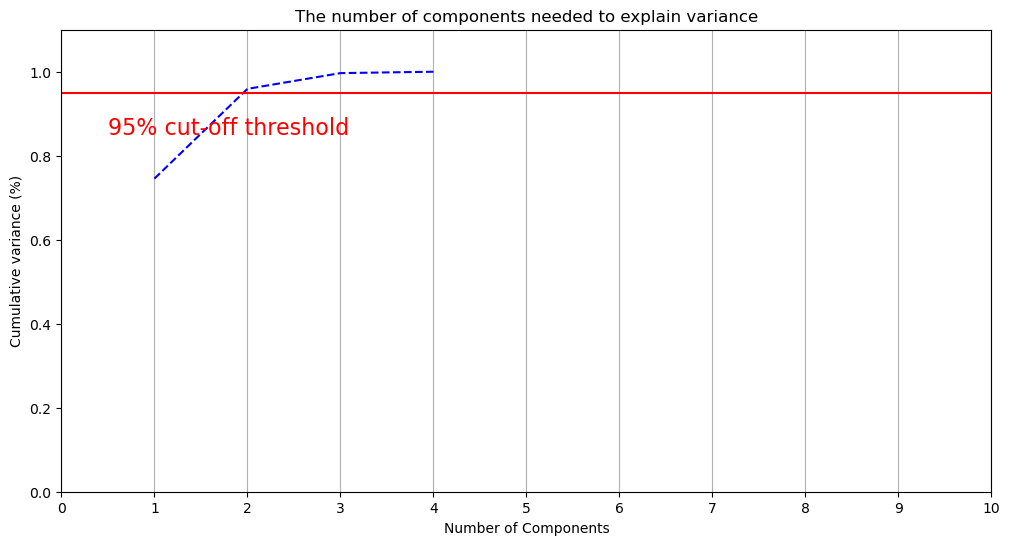

In [5]:
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
n=df.shape[1]
xi = np.arange(1, n+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)

plt.plot(xi, y, linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

Выделем первые две компоненты и визуализаируем в них данные

In [6]:
pca=PCA(n_components=2)
pca.fit(data_rescaled)
data_pca = pca.transform(data_rescaled)
df_pca = pd.DataFrame(data=data_pca, columns = ['principal component 1', 'principal component 2'])
df_pca

,principal component 1,principal component 2
0,-0.043792,0.326780
1,-0.470117,-0.646199
2,0.509464,0.266476
3,-0.196832,0.136307
4,-0.390992,-0.172025
...,...,...
564,-0.439293,-0.241378
565,-0.538801,-0.731424
566,-0.171144,0.228369
567,0.250478,1.951735


In [ ]:
df_pca.plot.scatter('principal component 1', 'principal component 2')